### 1.Predict delivery time using sorting time

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import linear_model


In [8]:
df=pd.read_csv('delivery_time.csv')

In [9]:
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [10]:
df.columns

Index(['Delivery Time', 'Sorting Time'], dtype='object')

In [11]:
df.columns=["DT","ST"]
df.columns

Index(['DT', 'ST'], dtype='object')

Text(0, 0.5, 'Delivery time')

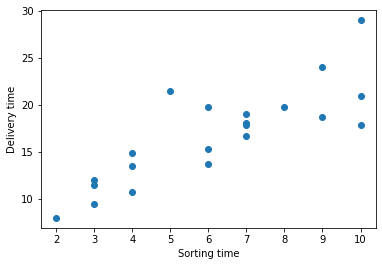

In [12]:
plt.scatter(df.ST,df.DT)
plt.xlabel('Sorting time')
plt.ylabel('Delivery time')

In [13]:
import statsmodels.formula.api as smf

In [41]:
model = smf.ols("ST~DT",data=df).fit()

<AxesSubplot:xlabel='DT', ylabel='ST'>

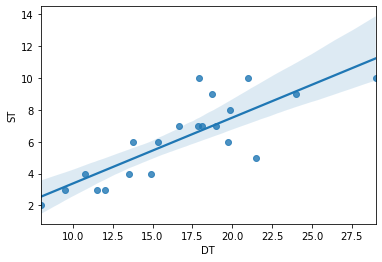

In [42]:
sns.regplot(x='DT',y='ST',data=df)

In [43]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ST   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 21 May 2021   Prob (F-statistic):           3.98e-06
Time:                        17:38:06   Log-Likelihood:                -36.839
No. Observations:                  21   AIC:                             77.68
Df Residuals:                      19   BIC:                             79.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7567      1.134     -0.667      0.513      -3.130       1.617
DT             0.4137      0.065      6.387      0.000       0.278       0.549
==============================================================================
Omnibus:                        1.409   Durbin-Watson:                   1.346
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                0.371
Skew:                           0.255   Prob(JB):                        0.831
Kurtosis:                       3.405   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

### Exponential Transformation

In [32]:
model1=smf.ols("ST~np.log(DT)",data=df).fit()

<AxesSubplot:xlabel='DT', ylabel='ST'>

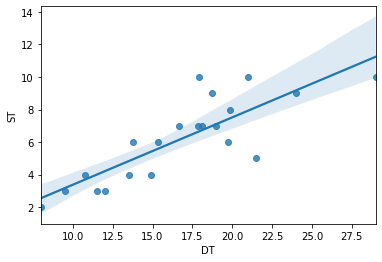

In [44]:
sns.regplot(x='DT',y='ST',data=df)

In [34]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ST   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Fri, 21 May 2021   Prob (F-statistic):           1.59e-06
Time:                        17:29:41   Log-Likelihood:                -35.846
No. Observations:                  21   AIC:                             75.69
Df Residuals:                      19   BIC:                             77.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -12.4992      2.751     -4.543      0.000     -18.257      -6.741
np.log(DT)     6.7355      0.985      6.836      0.000       4.673       8.798
==============================================================================
Omnibus:                        1.323   Durbin-Watson:                   1.202
Prob(Omnibus):                  0.516   Jarque-Bera (JB):                0.242
Skew:                          -0.025   Prob(JB):                        0.886
Kurtosis:                       3.523   Cond. No.                         28.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
(model1.rsquared,model1.rsquared_adj)

(0.7109478980584186, 0.6957346295351775)

### Square root transformation of variable

In [36]:
model2=smf.ols('ST~np.sqrt(DT)',data=df).fit()

<AxesSubplot:xlabel='DT', ylabel='ST'>

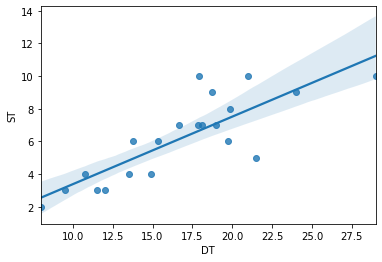

In [45]:
sns.regplot(x='DT',y='ST',data=df)

In [39]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ST   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     45.20
Date:                Fri, 21 May 2021   Prob (F-statistic):           2.00e-06
Time:                        17:36:50   Log-Likelihood:                -36.093
No. Observations:                  21   AIC:                             76.19
Df Residuals:                      19   BIC:                             78.28
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -7.6154      2.077     -3.667      0.002     -11.962      -3.269
np.sqrt(DT)     3.4073      0.507      6.723      0.000       2.347       4.468
==============================================================================
Omnibus:                        1.570   Durbin-Watson:                   1.249
Prob(Omnibus):                  0.456   Jarque-Bera (JB):                0.368
Skew:                           0.109   Prob(JB):                        0.832
Kurtosis:                       3.611   Cond. No.                         29.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###  Quadratic model

In [46]:
df['ST_sq']=df.ST*df.ST

In [48]:
model3=smf.ols('np.log(DT)~ST+ST_sq',data=df).fit()

<AxesSubplot:xlabel='DT', ylabel='ST'>

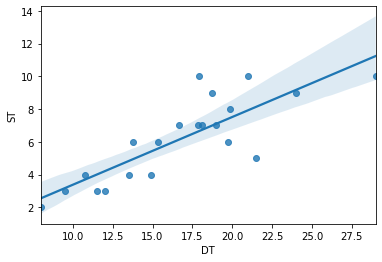

In [49]:
sns.regplot(x='DT',y='ST',data=df)

In [50]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(DT)   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     29.28
Date:                Fri, 21 May 2021   Prob (F-statistic):           2.20e-06
Time:                        17:43:39   Log-Likelihood:                 9.9597
No. Observations:                  21   AIC:                            -13.92
Df Residuals:                      18   BIC:                            -10.79
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6997      0.228      7.441      0.000       1.220       2.180
ST             0.2659      0.080      3.315      0.004       0.097       0.434
ST_sq         -0.0128      0.006     -2.032      0.057      -0.026       0.000
==============================================================================
Omnibus:                        2.548   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                1.777
Skew:                           0.708   Prob(JB):                        0.411
Kurtosis:                       2.846   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Quadratic model has greater Rsquared value hence that will be the best fit model

## 2.Build a prediction model of salary hike

In [51]:
data=pd.read_csv('Salary_data.csv')

In [52]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [54]:
data.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [55]:
data.columns=['years','salary']

In [57]:
model4=smf.ols('salary~years',data=data).fit()

<AxesSubplot:xlabel='years', ylabel='salary'>

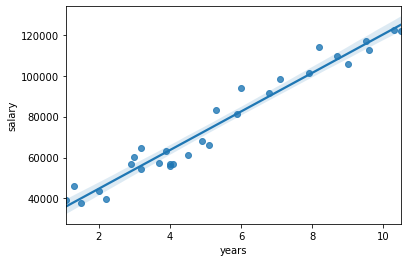

In [58]:
sns.regplot(x='years',y='salary',data=data)

In [59]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 21 May 2021   Prob (F-statistic):           1.14e-20
Time:                        18:03:31   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
years       9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
(model4.rsquared)

0.9569566641435086